In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Input 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls "/content/drive/My Drive"

'Advanced Deep Learning and Computer Vision CEP - 1'  'Colab Notebooks'


In [6]:
df_train = pd.read_csv('/content/drive/My Drive/Advanced Deep Learning and Computer Vision CEP - 1/trainLabels.csv')

In [7]:
df_train.values

array([['84_left', 0],
       ['84_right', 0],
       ['95_left', 0],
       ...,
       ['9998_left', 0],
       ['9998_right', 0],
       ['9999_left', 0]], dtype=object)

In [8]:
df_train.tail()

,image,level
1422,9996_left,0
1423,9996_right,0
1424,9998_left,0
1425,9998_right,0
1426,9999_left,0


In [9]:
targets_series = pd.Series(df_train['level'])
one_hot = pd.get_dummies(targets_series, sparse = True)

In [10]:
targets_series[:10]

0    0
1    0
2    0
3    0
4    3
5    3
6    0
7    0
8    0
9    1
Name: level, dtype: int64

In [11]:
one_hot[:10]

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,1,0,0,0,0
7,1,0,0,0,0
8,1,0,0,0,0
9,0,1,0,0,0


In [12]:
one_hot_labels = np.asarray(one_hot)
one_hot_labelsY = np.asarray(targets_series)
one_hot_labelsY[:10]

array([0, 0, 0, 0, 3, 3, 0, 0, 0, 1])

In [13]:
im_size1 = 786
im_size2 = 786
x_train = []
y_train = []

In [14]:
i = 0 
for f, breed in tqdm(df_train.values):
    print(f)

100%|██████████| 1427/1427 [00:00<00:00, 18281.17it/s]

84_left
84_right
95_left
95_right
99_left
99_right
842_left
842_right
844_left
844_right
845_left
845_right
851_left
851_right
857_left
857_right
862_left
862_right
863_left
863_right
865_left
865_right
866_left
866_right
869_left
869_right
876_left
876_right
877_left
877_right
878_left
878_right
879_left
879_right
880_left
880_right
885_left
885_right
886_left
886_right
897_left
897_right
899_left
899_right
904_left
904_right
905_left
905_right
906_left
906_right
909_left
909_right
910_left
910_right
912_left
912_right
914_left
914_right
916_left
916_right
917_left
917_right
921_left
921_right
925_left
925_right
928_left
928_right
929_left
929_right
930_left
930_right
931_left
931_right
932_left
932_right
934_left
934_right
935_left
935_right
936_left
936_right
939_left
939_right
940_left
940_right
941_left
941_right
943_left
943_right
945_left
945_right
947_left
947_right
953_left
953_right
958_left
958_right
959_left
959_right
960_left
960_right
963_left
963_right
966_left
966_right

In [15]:
df_test = df_train[:1000]

In [17]:
#OpenCV
i = 0 
for f, breed in tqdm(df_train.values):
    if type(cv2.imread('/content/drive/My Drive/Advanced Deep Learning and Computer Vision CEP - 1/dataset/{}.jpeg'.format(f)))==type(None):
        continue
    else:
        img = cv2.imread('/content/drive/My Drive/Advanced Deep Learning and Computer Vision CEP - 1/dataset/{}.jpeg'.format(f))
        label = one_hot_labels[i]
        x_train.append(cv2.resize(img, (im_size1, im_size2)))
        y_train.append(label)
        i += 1
np.save('x_train2',x_train)
np.save('y_train2',y_train)
print('Done')

100%|██████████| 1427/1427 [10:34<00:00,  2.25it/s]


Done


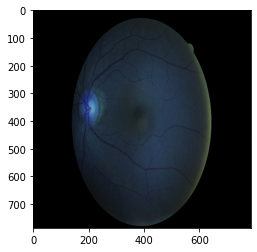

In [18]:
plt.imshow(x_train[681]/255)
plt.show()

In [19]:
x_valid = []
y_valid = []
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [20]:
visible = Input(shape=(786,786,3))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

In [21]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
y_train_raw = np.array(Y_train)
x_train_raw = np.array(X_train)

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 786, 786, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 783, 783, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 391, 391, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 388, 388, 16)      8208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 194, 194, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 602176)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                602177

In [ ]:
model.fit(x_train_raw, y_train_raw, epochs=5)

In [27]:
x_valid_raw = np.array(X_valid)
y_valid_raw = np.array(Y_valid)

In [ ]:
test_loss, test_acc = model.evaluate(x_valid_raw, y_valid_raw)
test_loss
test_acc